In [1]:
import torch

import pandas as pd

import matplotlib.pyplot as plt

import torchvision

import torch.nn as nn

import torch.nn.functional as F

import numpy as np

In [4]:
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.shape

(414, 8)

# Deep Learning Process


- Change pandas to numpy

In [16]:
numpy_input = df[df.columns[[1,2,3,4,5,6]]].values
numpy_target = df[df.columns[-1]].values.reshape(-1,1)

In [17]:
numpy_input.shape , numpy_target.shape

((414, 6), (414, 1))

- Change numpy to tensor

In [51]:
tensor_input = torch.from_numpy(numpy_input).type(torch.float32)
tensor_target = torch.from_numpy(numpy_target).type(torch.float32)


In [52]:
tensor_input.shape , tensor_target.shape

(torch.Size([414, 6]), torch.Size([414, 1]))

- Save the data using TensorDataset

In [53]:
dataset = torch.utils.data.TensorDataset(tensor_input , tensor_target)

- split the data for test and train 

In [54]:
train , test =torch.utils.data.dataset.random_split(dataset , [314,100])

In [55]:
batch_size=20

train_loader = torch.utils.data.DataLoader(train , shuffle=True,batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test , batch_size=batch_size)

In [56]:
#print first 20 data

for x , y in train_loader:
    print (x)
    print(y)
    break

tensor([[2.0135e+03, 8.5000e+00, 1.0481e+02, 5.0000e+00, 2.4967e+01, 1.2154e+02],
        [2.0133e+03, 3.7200e+01, 1.8651e+02, 9.0000e+00, 2.4977e+01, 1.2154e+02],
        [2.0135e+03, 1.6600e+01, 2.8932e+02, 5.0000e+00, 2.4982e+01, 1.2154e+02],
        [2.0130e+03, 1.8000e+01, 1.4148e+03, 1.0000e+00, 2.4952e+01, 1.2155e+02],
        [2.0133e+03, 6.3000e+00, 9.0456e+01, 9.0000e+00, 2.4974e+01, 1.2154e+02],
        [2.0132e+03, 1.1600e+01, 2.0189e+02, 8.0000e+00, 2.4985e+01, 1.2154e+02],
        [2.0128e+03, 1.8000e+01, 6.3062e+03, 1.0000e+00, 2.4957e+01, 1.2148e+02],
        [2.0129e+03, 1.8900e+01, 1.0092e+03, 0.0000e+00, 2.4964e+01, 1.2155e+02],
        [2.0131e+03, 0.0000e+00, 2.7401e+02, 1.0000e+00, 2.4975e+01, 1.2153e+02],
        [2.0134e+03, 0.0000e+00, 2.9300e+02, 6.0000e+00, 2.4977e+01, 1.2154e+02],
        [2.0135e+03, 1.6800e+01, 4.0666e+03, 0.0000e+00, 2.4943e+01, 1.2150e+02],
        [2.0133e+03, 1.7000e+00, 3.2997e+02, 5.0000e+00, 2.4983e+01, 1.2154e+02],
        [2.0131e

### Create Our Neural Net Model

In [80]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(6,32)
        self.fc2 = nn.Linear(32,16)
        self.fc3 = nn.Linear(16,1)
        
        
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
    
model = NeuralNet()

criterion  = nn.L1Loss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

- Learn the model

In [81]:
epochs = 500


for epoch in range(epochs):
    
    for data in train_loader:
        X, y =data
        
        #feed forward
        
        prediction = model(X)
        
        loss = criterion(prediction , y)
        
        #backpropagation
        
        model.zero_grad()
        
        loss.backward()
        
        #update the weight and bias
        optimizer.step()
        
    print(f'Epoch: {epoch} , loss: {loss} ')

Epoch: 0 , loss: 14.00847339630127 
Epoch: 1 , loss: 7.3585286140441895 
Epoch: 2 , loss: 8.617691993713379 
Epoch: 3 , loss: 5.759811878204346 
Epoch: 4 , loss: 6.823306083679199 
Epoch: 5 , loss: 7.315831661224365 
Epoch: 6 , loss: 6.386158466339111 
Epoch: 7 , loss: 5.925745964050293 
Epoch: 8 , loss: 2.246493339538574 
Epoch: 9 , loss: 7.3233323097229 
Epoch: 10 , loss: 8.432138442993164 
Epoch: 11 , loss: 4.669779300689697 
Epoch: 12 , loss: 4.787692070007324 
Epoch: 13 , loss: 6.574764251708984 
Epoch: 14 , loss: 5.354014873504639 
Epoch: 15 , loss: 6.177053928375244 
Epoch: 16 , loss: 7.458294868469238 
Epoch: 17 , loss: 5.651576519012451 
Epoch: 18 , loss: 6.311790466308594 
Epoch: 19 , loss: 4.382305145263672 
Epoch: 20 , loss: 7.312204837799072 
Epoch: 21 , loss: 8.4595365524292 
Epoch: 22 , loss: 8.103106498718262 
Epoch: 23 , loss: 7.442405700683594 
Epoch: 24 , loss: 5.2426228523254395 
Epoch: 25 , loss: 4.324563503265381 
Epoch: 26 , loss: 5.709602355957031 
Epoch: 27 , l

Epoch: 218 , loss: 4.346458435058594 
Epoch: 219 , loss: 2.7244129180908203 
Epoch: 220 , loss: 5.5025858879089355 
Epoch: 221 , loss: 7.191744327545166 
Epoch: 222 , loss: 3.6610779762268066 
Epoch: 223 , loss: 4.659515380859375 
Epoch: 224 , loss: 7.173439025878906 
Epoch: 225 , loss: 5.007287502288818 
Epoch: 226 , loss: 3.8777918815612793 
Epoch: 227 , loss: 4.456408977508545 
Epoch: 228 , loss: 13.148979187011719 
Epoch: 229 , loss: 5.364165306091309 
Epoch: 230 , loss: 6.837596416473389 
Epoch: 231 , loss: 6.157584190368652 
Epoch: 232 , loss: 6.001044273376465 
Epoch: 233 , loss: 5.738376617431641 
Epoch: 234 , loss: 3.7185378074645996 
Epoch: 235 , loss: 5.758044719696045 
Epoch: 236 , loss: 3.862220048904419 
Epoch: 237 , loss: 6.3581953048706055 
Epoch: 238 , loss: 6.176754951477051 
Epoch: 239 , loss: 8.7806978225708 
Epoch: 240 , loss: 6.291263103485107 
Epoch: 241 , loss: 5.37970495223999 
Epoch: 242 , loss: 6.0415520668029785 
Epoch: 243 , loss: 4.026585578918457 
Epoch: 

Epoch: 432 , loss: 3.0560038089752197 
Epoch: 433 , loss: 6.610049724578857 
Epoch: 434 , loss: 5.284694671630859 
Epoch: 435 , loss: 4.72568941116333 
Epoch: 436 , loss: 4.914687156677246 
Epoch: 437 , loss: 5.430793762207031 
Epoch: 438 , loss: 3.578329563140869 
Epoch: 439 , loss: 4.463860034942627 
Epoch: 440 , loss: 3.8117942810058594 
Epoch: 441 , loss: 3.7823984622955322 
Epoch: 442 , loss: 4.343161582946777 
Epoch: 443 , loss: 5.926392555236816 
Epoch: 444 , loss: 3.8639214038848877 
Epoch: 445 , loss: 5.885899543762207 
Epoch: 446 , loss: 6.403478145599365 
Epoch: 447 , loss: 5.967893123626709 
Epoch: 448 , loss: 5.17089319229126 
Epoch: 449 , loss: 3.4810125827789307 
Epoch: 450 , loss: 6.076964378356934 
Epoch: 451 , loss: 4.879147052764893 
Epoch: 452 , loss: 5.982441425323486 
Epoch: 453 , loss: 3.975098133087158 
Epoch: 454 , loss: 8.040731430053711 
Epoch: 455 , loss: 7.123094081878662 
Epoch: 456 , loss: 5.216462135314941 
Epoch: 457 , loss: 4.590414524078369 
Epoch: 45

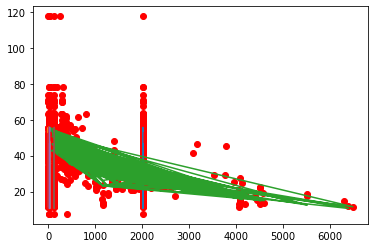

In [82]:
plt.plot(numpy_input , numpy_target , 'ro')
plt.plot(numpy_input , model(tensor_input).detach().numpy())

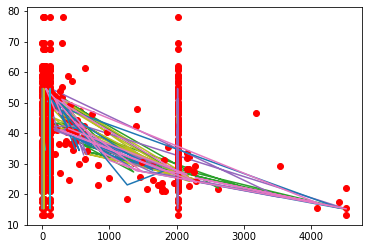

In [90]:
for X, y in test_loader:
    plt.plot(X.detach().numpy() , y.detach().numpy(),'ro')
    plt.plot(X.detach().numpy() , model(X).detach().numpy())